In [1]:
import os
import leafmap
from samgeo import SamGeo, tms_to_geotiff, get_basemaps

In [2]:
m = leafmap.Map(center=[29.676840, -95.369222], zoom=19)
m.add_basemap("SATELLITE")
m

Map(center=[29.67684, -95.369222], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title',…

In [3]:
if m.user_roi_bounds() is not None:
    bbox = m.user_roi_bounds()
else:
    bbox = [-95.3704, 29.6762, -95.368, 29.6775]

In [4]:
image = "satellite.tif"

In [5]:
tms_to_geotiff(output=image, bbox=bbox, zoom=20, source="Satellite", overwrite=True)

Downloaded image 01/40
Downloaded image 02/40
Downloaded image 03/40
Downloaded image 04/40
Downloaded image 05/40
Downloaded image 06/40
Downloaded image 07/40
Downloaded image 08/40
Downloaded image 09/40
Downloaded image 10/40
Downloaded image 11/40
Downloaded image 12/40
Downloaded image 13/40
Downloaded image 14/40
Downloaded image 15/40
Downloaded image 16/40
Downloaded image 17/40
Downloaded image 18/40
Downloaded image 19/40
Downloaded image 20/40
Downloaded image 21/40
Downloaded image 22/40
Downloaded image 23/40
Downloaded image 24/40
Downloaded image 25/40
Downloaded image 26/40
Downloaded image 27/40
Downloaded image 28/40
Downloaded image 29/40
Downloaded image 30/40
Downloaded image 31/40
Downloaded image 32/40
Downloaded image 33/40
Downloaded image 34/40
Downloaded image 35/40
Downloaded image 36/40
Downloaded image 37/40
Downloaded image 38/40
Downloaded image 39/40
Downloaded image 40/40
Saving GeoTIFF. Please wait...
Image saved to satellite.tif


In [6]:
m.layers[-1].visible = False  # turn off the basemap
m.add_raster(image, layer_name="Image")
m

Map(bottom=55514104.0, center=[29.67683954687463, -95.36922320723534], controls=(ZoomControl(options=['positio…

In [7]:
sam = SamGeo(
    model_type="vit_h",
    checkpoint="sam_vit_h_4b8939.pth",
    sam_kwargs=None,
)

In [8]:
mask = "segment.tif"
sam.generate(
    image, mask, batch=True, foreground=True, erosion_kernel=(3, 3), mask_multiplier=255
)

100%|██████████| 12/12 [59:36<00:00, 298.08s/it]


In [9]:
vector = "segment.gpkg"
sam.tiff_to_gpkg(mask, vector, simplify_tolerance=None)

In [10]:
shapefile = "segment.shp"
sam.tiff_to_vector(mask, shapefile)

In [11]:
style = {
    "color": "#3388ff",
    "weight": 2,
    "fillColor": "#7c4185",
    "fillOpacity": 0.5,
}
m.add_vector(vector, layer_name="Vector", style=style)
m

Map(bottom=55514093.0, center=[29.676865181142368, -95.36884233355525], controls=(ZoomControl(options=['positi…

In [14]:
import geopandas as gpd

In [16]:
segmentacion_shp = gpd.read_file('segment.shp')
segmentacion_shp

,value,geometry
0,255.0,"POLYGON ((-10616365.557 3462162.320, -10616365..."
1,255.0,"POLYGON ((-10616363.766 3462162.320, -10616363..."
2,255.0,"POLYGON ((-10616361.975 3462162.320, -10616361..."
3,255.0,"POLYGON ((-10616511.976 3462161.723, -10616511..."
4,255.0,"POLYGON ((-10616367.198 3462162.171, -10616365..."
...,...,...
1196,255.0,"POLYGON ((-10616373.616 3462007.249, -10616373..."
1197,255.0,"POLYGON ((-10616374.363 3462001.130, -10616373..."
1198,255.0,"POLYGON ((-10616570.783 3462002.026, -10616570..."
1199,255.0,"POLYGON ((-10616530.931 3462007.100, -10616530..."


<Axes: >

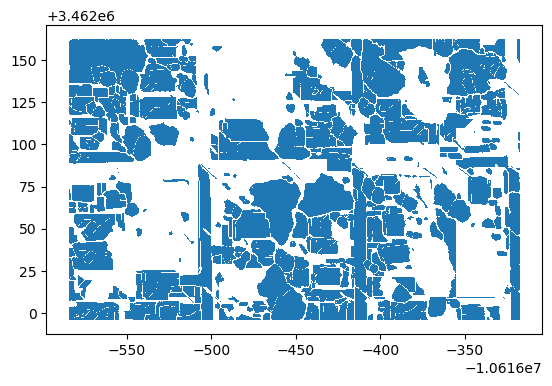

In [18]:
segmentacion_shp.plot()